In [1]:
import pandas as pd
import os
import sys
import argparse
import pandas as pd
sys.path.insert(0,'/Users/danielsola/Downloads/diurisation-pet-proj-master_3/')
# gpu configuration
import src.vggvoxvlad.split as splt
import matplotlib.pyplot as plt
import src.vggvoxvlad.model as model
import src.tool.toolkits as toolkits
import src.vggvoxvlad.utils_dan as ut_d
import src.vggvoxvlad.utils as ut
import numpy as np


args=[]

parser = argparse.ArgumentParser()
# set up training configuration.
parser.add_argument('--gpu', default='', type=str)
parser.add_argument('--resume', default=r'pretrained/weights.h5', type=str)
parser.add_argument('--data_path', default='4persons', type=str)
# set up network configuration.
parser.add_argument('--net', default='resnet34s', choices=['resnet34s', 'resnet34l'], type=str)
parser.add_argument('--ghost_cluster', default=2, type=int)
parser.add_argument('--vlad_cluster', default=8, type=int)
parser.add_argument('--bottleneck_dim', default=512, type=int)
parser.add_argument('--aggregation_mode', default='gvlad', choices=['avg', 'vlad', 'gvlad'], type=str)
# set up learning rate, training loss and optimizer.
parser.add_argument('--loss', default='softmax', choices=['softmax', 'amsoftmax'], type=str)
parser.add_argument('--test_type', default='normal', choices=['normal', 'hard', 'extend'], type=str)

args = parser.parse_args(args=[])
toolkits.initialize_GPU(args)

Using TensorFlow backend.


In [2]:
params = {'dim': (257, None, 1),
          'nfft': 512,
          'spec_len': 250,
          'win_length': 400,
          'hop_length': 160,
          'n_classes': 1251,
          'sampling_rate': 16000,
          'normalize': True,
          }

weight_path = '../models/vggvox/weights-09-0.923.h5'
net = splt.make_network(weight_path, args)

In [3]:
file = r'../data/raw/Jack Black on Late show with David Letterman part 1.wav'
result_list = splt.voxceleb1_split(path=file, network=net)

   Time (s)           Speaker  Probability Country Gender
0         3   David Letterman     0.161908     USA      m
1         3  Jason Mantzoukas     0.135771     USA      m
2         3     Jim Jefferies     0.083577     USA      m
   Time (s)           Speaker  Probability Country Gender
0         6        Rik Mayall     0.211610      UK      m
1         6  Bruce Boxleitner     0.176792     USA      m
2         6     Sam Waterston     0.090996     USA      m
   Time (s)           Speaker  Probability Country Gender
0         9   David Letterman     0.621088     USA      m
1         9    Patrick Swayze     0.086521     USA      m
2         9  Wentworth Miller     0.063001     USA      m
   Time (s)           Speaker  Probability Country Gender
0        12   David Letterman     0.956954     USA      m
1        12    Patrick Swayze     0.021308     USA      m
2        12  Bruce Boxleitner     0.006101     USA      m
   Time (s)           Speaker  Probability Country Gender
0        15   

   Time (s)           Speaker  Probability Country Gender
0       114      Damian Lewis     0.215399      UK      m
1       114        Reid Scott     0.140599  Canada      m
2       114  Kristen Johnston     0.074235     USA      f
   Time (s)       Speaker  Probability Country Gender
0       117  Kel Mitchell     0.403779     USA      m
1       117    Jamie Foxx     0.124862     USA      m
2       117    Rik Mayall     0.122698      UK      m
   Time (s)             Speaker  Probability Country Gender
0       120            Jon Seda     0.591690     USA      m
1       120     David Letterman     0.064060     USA      m
2       120  John Carroll Lynch     0.054136     USA      m
   Time (s)      Speaker  Probability Country Gender
0       123   Jack Black     0.943057     USA      m
1       123  Jason Segel     0.014357     USA      m
2       123   Matt Bomer     0.006109     USA      m
   Time (s)        Speaker  Probability Country Gender
0       126     Jack Black     0.903255     U

   Time (s)          Speaker  Probability Country Gender
0       225  David Letterman     0.946801     USA      m
1       225   Patrick Swayze     0.037978     USA      m
2       225    Kate McKinnon     0.002808     USA      f
   Time (s)       Speaker  Probability    Country Gender
0       228    Jack Black     0.995412        USA      m
1       228  Grant Bowler     0.000998  Australia      m
2       228   Jason Segel     0.000311        USA      m
   Time (s)        Speaker  Probability  Country Gender
0       231     Jack Black     0.860965      USA      m
1       231   Glen Hansard     0.030176  Ireland      m
2       231  Michael Kelly     0.019803      USA      m
   Time (s)          Speaker  Probability Country Gender
0       234       Jack Black     0.984707     USA      m
1       234  David Schwimmer     0.008204     USA      m
2       234     Josh Duhamel     0.001298     USA      m
   Time (s)       Speaker  Probability Country Gender
0       237    Jack Black     0.957525

   Time (s)          Speaker  Probability Country Gender
0       336  David Letterman     0.440518     USA      m
1       336    Jeff Goldblum     0.261188     USA      m
2       336     Tom Bergeron     0.033253     USA      m
   Time (s)         Speaker  Probability Country Gender
0       339      Jack Black     0.990131     USA      m
1       339    Sam Palladio     0.003499      UK      m
2       339  Tyler Hoechlin     0.001182     USA      m
   Time (s)     Speaker  Probability Country Gender
0       342  Jack Black     0.719122     USA      m
1       342   Dean Cain     0.035963     USA      m
2       342  Adam Brody     0.030526     USA      m
   Time (s)       Speaker  Probability Country Gender
0       345    Jack Black     0.988587     USA      m
1       345  Romeo Miller     0.002837     USA      m
2       345   Jason Segel     0.000615     USA      m
   Time (s)       Speaker  Probability Country Gender
0       348    Jack Black     0.983058     USA      m
1       348  Rom

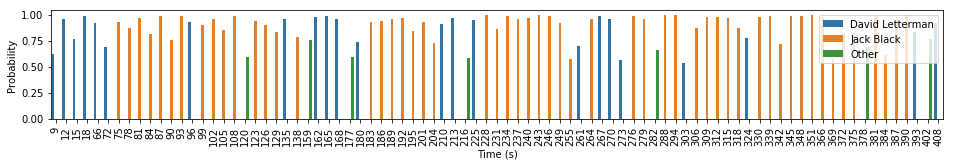

In [4]:
splt.plot_split(result_list)